### Single Variable Regression with Gradient Descent  ( Mathematical Steps ) 


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Plotting : y = 3x + 1

In [ ]:
x=np.linspace(-3,3,7)
x

In [ ]:
y=3*x+ 1
y

In [ ]:
plt.plot(x,y,'r-')
plt.grid(True)
plt.xlabel('X-Values',fontsize=15)
plt.ylabel('Y-Values',fontsize=15)
plt.axis([-4,4,-9,11])
plt.axhline()
plt.axvline()

### Above Equation Using  Matrix Concepts

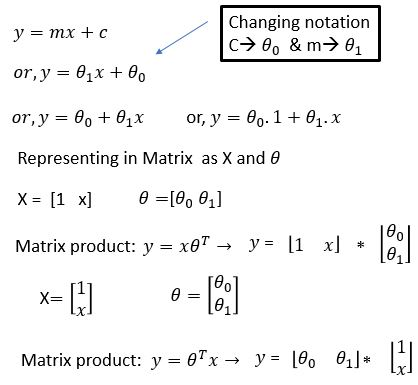

In [ ]:
### Againg Generating above x and y data points for --> y = 3x + 1
x=np.linspace(-3,3,7)
print(x,'\n')
y=3*x+ 1   #
print(y)

In [ ]:
### Defining theta vector
theta=np.array([1,3])
print(theta)
theta=theta.reshape(2,1) # Reshaping it.
theta
## We can define theta in any shape, as we wish.

In [ ]:
## Defining first point of x i.e. '-3', we have to write with 1 like below to match with matrix format as above.
X=np.array([[1,-3]])
X

In [ ]:
## Now we have X matrix and theta matrix, we can implement matrix product of x and theta as below:
y=np.dot(X,theta) ## y=mx+c
print(y) # So the result is -8  when x=-3 in eqn  y = 3x + 1.It is right we have already generated y for different values

In [ ]:
## Putting all above in one cell
theta=np.array([[1],[3]])  # 2X1
print(theta,'\n')
X=np.array([[1,-3]])  #1X2
print(X)
y=np.dot(X,theta)
y

#### Calculating y for all values of x  in one shot in eqn  y = 3x + 1
#### Taking X= [-3, -2 ,  -1,   0,   1,  2,   3 ]

In [ ]:
theta=np.array([[1],[3]])  # 2X1
print(theta,'\n\n')
X=np.array([[1,-3],[1,-2],[1,-1],[1,0],[1,1],[1,2],[1,3]])  #7X2, taking all values of x
print(X,'\n\n')
y=X.dot(theta)#=np.dot(X,thet)   # 7X1
print(y)

#### There is one big issue with this approach--> we have to manually write one infront of each value of x to  make a matrix  of X, which is very tedious and not practical,  as in real life there may be thousands or millions of x.
#### * Following is the best way to make X matrix with 1 value infront of each x.

In [ ]:
x=np.linspace(-3,3,7) ##  Initial X
x

In [ ]:
x[:,np.newaxis] ## Converting into  one column

In [ ]:
np.ones((7,1)) ## Making column containing 1 for each corresponding x

In [ ]:
X=np.hstack([np.ones((7,1)),x[:,np.newaxis]]) # Horizontally stacking ones and X
X

In [ ]:
theta=np.array([[1],[3]])
theta

In [ ]:
Y=np.dot(X,theta)
Y

### Combining all in one cell :

In [ ]:
# y=3*x+ 1
x=np.linspace(-5,5,11)
print('Initial X:\n\n ', x)
m=len(x)
x=x[:,np.newaxis]
ones=np.ones((m,1))
x1=np.hstack((ones,x)) #7X2  ** 2X1
print('\nX wiht 1 stacked : \n\n ', x1)
theta=np.array([[1,3]])## 1X2
y=x1.dot(theta.T) # y=mx+C
y

### Importing Data in Tabular format

In [ ]:
data=pd.read_csv('ex1data1.txt',header=None)
data.rename(columns={0:'Population',1:'Profit'},inplace=True)
data.head()

In [ ]:
data.info()

In [ ]:
plt.scatter(data.Population,data.Profit)
plt.xlabel('Population of the city in 10,000')
plt.ylabel('Profit of Appolo Pharmacy in 10,000')

### Separating feature X and output Y

In [ ]:
x=data.Population.values
y=data.Profit.values
x=x[:,np.newaxis]
m=len(x) ## number of data points
one=np.ones((m,1))
X=np.hstack([one,x])
Y=y[:,np.newaxis]

### Gradient Calculation
* First Eqn is gradient of cost with respect to theta_0
* Second Eqn is gradient of cost with respect to theata_1

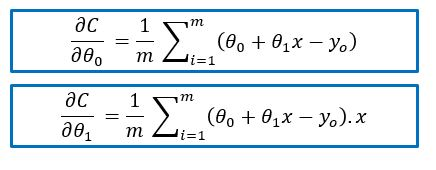
#### Now implementing exaclty these two Eqn in syntax:

### Assuming theta

In [ ]:
np.random.seed(0)
theta=np.random.randn(2,1)
theta # (2,1)

#### Calculating gradient with respect to theta_0

In [ ]:
print(X.shape)
print(theta.shape)
X.dot(theta)                 # np.dot(X.theta)  # predicted yp=mx +c where m=theta1,c=theta0
X.dot(theta)-Y               # Error  calculation
(1/m)*np.sum(X.dot(theta)-Y) # gradient with respect to theta_0

#### Calculating gradient with respect to theta_1

In [ ]:
X.dot(theta)-Y                    # Error  calculation
print(X.shape)
print(x.shape)
(X.dot(theta)-Y)*x               # Multiplication of each error with each individual value of x, Elementwise multiplication
(1/m)*np.sum((X.dot(theta)-Y)*x) #gradient with respect to theta_1

### Combining both into one equation
* Here for simpliciyt only 3 rows of data (in both X and A matrix) has shown, actually it has 'm' rows  containing all the data
* X is feature matrix
* A is the resulting matrix of error calculation i.e. result of eqn --> X.dot(theta)-Y    

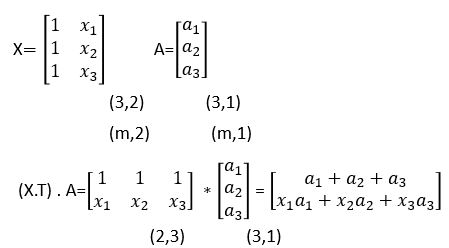

### Note the two element of resulting matrix:
* The first element is sum of each error, i.e. gradient with respect to theta_0, see the eqn above.
* The Second element is the sum of the element-wise product of each error and  x, i.e. gradient with respect to thata_1.
* Thus if we, multiply X transpose with A we can get both gradient in one shot, as given below:

In [ ]:
(X.dot(theta)-Y) ## It is a matirx A
# Now this matrix should be multiplied with X transpose --> X.T

In [ ]:
grad=(1/m)*X.T.dot((X.dot(theta)-Y)) ## Grad calculation
grad

### Gradient Descent

In [ ]:
a=0.001 # Learning Rate

In [ ]:
theta=theta-a*grad  ## This is one step of Gradient Descent.
theta

### Applyting Gradient Descent

In [ ]:
np.random.seed(0)
theta=np.random.randn(2,1)
theta

In [ ]:
n_iterations=10000
alpha=0.01
for iteration in range(n_iterations):
    grad=(1/m)*X.T.dot((X.dot(theta)-Y))
    theta=theta-alpha*grad ## Gradient descent
    
print(theta)

### Cost Calculation

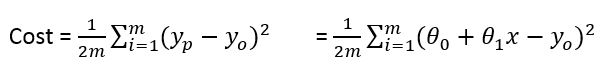

In [ ]:
(X.dot(theta)-Y)

In [ ]:
(1/(2*m))*np.sum(np.square((X.dot(theta)-Y)))

### Including cost calculatin for each iteration i.e. for each updated theta inside loop

In [ ]:
theta=np.random.randn(2,1)
n_iterations=10000
cost=np.zeros(n_iterations)
alpha=0.01
for iteration in range(n_iterations):
    grad=(1/m)*X.T.dot((X.dot(theta)-Y))
    theta=theta-alpha*grad
    cost[iteration]=(1/(2*m))*np.sum(np.square((X.dot(theta)-Y)))
theta

In [ ]:
cost

In [ ]:
plt.plot(cost) ## Potting  cost funtion. Cost must decrease in each step if our code is impletmented conrrectly.

In [ ]:
theta

In [ ]:
yp=X.dot(theta)  # This is predicted y for each x
yp

In [ ]:
plt.scatter(data.Population,data.Profit) ## Original data
plt.plot(x,yp,'r-') ##  x versus predicted y in red color

In [ ]:
## Making function for prediction
def predict(x):
    theta=np.array([[-3.89578081],[ 1.19303364]])
    X1=np.array([[1,x]])
    yp=X1.dot(theta)
    return yp[0,0]

In [ ]:
predict(19)

### Concept of Error/Tolerance > while loop
* Instead of Running large number of iteration, we can check for change in cost in each consecutive iteration and stop the iteration if there is no significant change in the cost.
* We can choose the value for the difference in cost between any two consecutive iteraion, say 10^-8. If this difference is achieced, we can stop iteration.This value is called Tolerance or Error.
* This can be implemented using while loop.This is more efficient way.This will save us from running unnecessary number of loop.

In [ ]:
np.random.randn(2,1)

In [ ]:
theta=np.random.randn(2,1)
print(theta)
#n_iterations=10000
cost=[]
alpha=0.01 ### learning rate ,Multiple trial
iteration=0
error=10

while error> 1e-8: # 1 X 10^-8
    grad=(1/m)*X.T.dot((X.dot(theta)-Y))
    theta=theta-alpha*grad
    cost.append((1/(2*m))*np.sum(np.square((X.dot(theta)-Y))))
    if iteration>1:
        error=abs(cost[iteration]-cost[iteration-1])
    iteration+=1
    
print(iteration)   
print(theta) 

In [ ]:
plt.plot(cost)

In [ ]:
print(theta)
yp=X.dot(theta)                           # Predicted Y
plt.plot(x,yp,'r-')                       # x versus predicted Y
plt.scatter(data.Population,data.Profit)  # Initial data plot

### Plotting approximated line in each loop

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(data.Population,data.Profit)## plotting all the data
theta=np.random.randn(2,1)
#n_iterations=10000
cost=[]
alpha=0.01
iteration=0
error=10
while error>1e-10:
    grad=(1/m)*X.T.dot((X.dot(theta)-Y))
    theta=theta-alpha*grad
    cost.append((1/(2*m))*np.sum(np.square((X.dot(theta)-Y))))
    if iteration>1:
        error=abs(cost[iteration]-cost[iteration-1])
    iteration+=1
    ### for plotting line after every 100 iteration
    
    if (iteration==1)or(iteration%100==0):
        yp=X.dot(theta)
        plt.plot(x,yp)

print(iteration)   
print(theta)
yp=X.dot(theta)
plt.plot(x,yp)

## Prediction

In [ ]:
def predict(theta,x):## x must be passed as one dimensional array
    X=np.hstack([np.ones((len(x),1)),x[:,np.newaxis]])
    yp=X.dot(theta)
    return yp[0,0]

In [ ]:
predict(theta,np.array([17]))

## Concept of Train_Test_Split and Accuracy

In [ ]:
data

In [ ]:
import random as r

In [ ]:
data.index

In [ ]:
ind=data.index.to_list()
ind

In [ ]:
list(data.index)

In [ ]:
m=len(ind)
m

In [ ]:
97*0.2

In [ ]:
r.sample([1,2,3,4,5,6],3)

In [ ]:
r.seed(0)
index=r.sample(ind,int(m*0.2))  ## Non repetitive randomly selected number from first argument, here list
index

In [ ]:
test=data.iloc[index]
test

In [ ]:
train=data.drop(index,axis=0)
train

In [ ]:
Y_train=train.iloc[:,-1].values
Y_train

In [ ]:
X_train=train.iloc[:,:-1].values
X_train

### Implementing all above in One cell below inside function

In [ ]:
import random as r
#r.seed(0)
def train_test_split(df,test_proportion):
    ind=df.index.tolist()
    m=len(ind)
    index=r.sample(ind,int(m*test_proportion))
    
    test=df.iloc[index]
    X_test=test.iloc[:,:-1].values
    Y_test=test.iloc[:,-1].values
    
    train=df.drop(index,axis=0)
    X_train=train.iloc[:,:-1].values
    Y_train=train.iloc[:,-1].values
    
    return X_train,X_test,Y_train,Y_test

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(data,0.2)

In [ ]:
X_train

In [ ]:
Y_train

In [ ]:
X_test

In [ ]:
Y_test

In [ ]:
data.head()

### Implementation of linear Regresion inside function

In [ ]:
def linear_reg_model(X_train,Y_train,iteration,alpha1):
    m=len(X_train)
    one=np.ones((m,1))
    X=np.hstack([one,X_train])
    Y=Y_train[:,np.newaxis]
    theta=np.random.randn(2,1)## Initialization of constants
    alpha=alpha1
    n_iterations=iteration
    cost=np.zeros(n_iterations)
    for iteration in range(n_iterations):
        grad=(1/m)*X.T.dot((X.dot(theta)-Y))
        theta=theta-alpha*grad
        cost[iteration]=(1/(2*m))*np.sum(np.square((X.dot(theta)-Y)))
    return theta,cost

### Prediction function

In [ ]:
def predict(theta,x):## x must be passed as two dimensional array,(Multiple rows and one column)
    one=one=np.ones((len(x),1))
    X=np.hstack((one,x))
    yp=X.dot(theta)
    return yp

### Now Using all above function  for making linear model on train data and testing accuracy on test data.

In [ ]:
## Using function for train test split
X_train,X_test,Y_train,Y_test=train_test_split(data,0.2)

In [ ]:
X_train

In [ ]:
Y_train

In [ ]:
X_test

In [ ]:
## Usinf function for linear model
theta,cost=linear_reg_model(X_train,Y_train,10000,0.01)

In [ ]:
theta

In [ ]:
cost

In [ ]:
plt.plot(cost)

In [ ]:
X_test

In [ ]:
Y_test

### Testing Accuracy on test data

In [ ]:
## Using prediction function
y_pred=predict(theta,X_test)
y_pred

In [ ]:
MAE=np.mean(abs(Y_test-y_pred.ravel())) ## Mean Absolute Error
MAE

In [ ]:
MSE=np.mean(np.square(Y_test-y_pred.ravel())) ## Mean Squared Error
MSE

In [ ]:
RMSE=np.sqrt(MSE) ## Root Mean Square Error
RMSE

In [ ]:
#### Testing Accuracy on train data

In [ ]:
y_pred=predict(theta,X_train)
MAE=np.mean(abs(Y_train-y_pred.ravel())) ## Mean Absolute Error
MSE=np.mean(np.square(Y_train-y_pred.ravel())) ## Mean Squared Error
RMSE=np.sqrt(MSE) ## Root Mean Square Error
print('MAE:', MAE,'\n','MSE:',MSE,'\n','RMSE:',RMSE)

### Stochastic Gradient Descent Algorithms and its Implementation

In [ ]:
x

In [ ]:
X

In [ ]:
Y

In [ ]:
n_epoch=50
t0,t1=5,500 ## learning Schedule hyperparameter

def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2,1)
m=len(x)
cost=[]

for epoch in range(n_epoch):
    for i in range(m):
        random_index=np.random.randint(m)
        Xi=X[random_index:random_index+1]
        Yi=Y[random_index:random_index+1]
        grad=Xi.T.dot((Xi.dot(theta)-Yi))
        alpha=learning_schedule(epoch*m+i)
        theta=theta-alpha*grad
    cost.append((1/(2*m))*np.sum(np.square((X.dot(theta)-Y))))
      
print(theta)

In [ ]:
plt.plot(cost)